# Вариант задания: Прогнозирование выручки в магазинах
### Бизнес-цели:
Цель: Разработать модель машинного обучения, которая позволит прогнозировать распродажи магазина в зависимоси от его ассортимента.

### Цели технического проекта:

Сбор и подготовка данных:
Очистка данных от пропусков, выбросов и дубликатов.
Преобразование категориальных переменных в числовые.
Разделение данных на обучающую и тестовую выборки.


In [62]:
import pandas as pn
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
df = pn.read_csv(".//static//csv//Stores.csv")
print(df.columns)

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')


Разделим на 3 выборки


In [63]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки (80% - обучение, 20% - тест)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Разделение обучающей выборки на обучающую и контрольную (80% - обучение, 20% - контроль)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", len(train_data))
print("Размер контрольной выборки:", len(val_data))
print("Размер тестовой выборки:", len(test_data))

Размер обучающей выборки: 572
Размер контрольной выборки: 144
Размер тестовой выборки: 180


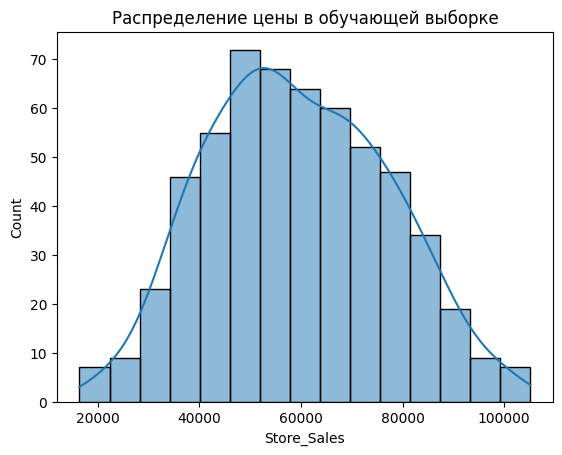

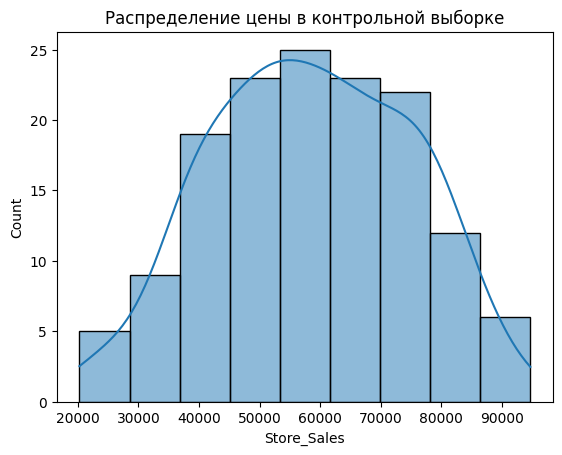

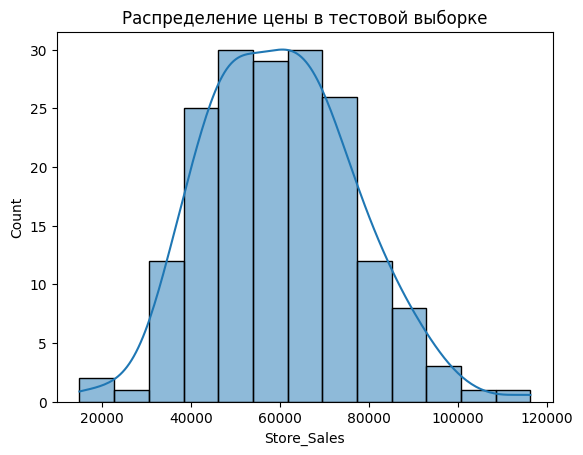

In [64]:

import seaborn as sns
import matplotlib.pyplot as plt

# Гистограмма распределения цены в обучающей выборке
sns.histplot(train_data["Store_Sales"], kde=True)
plt.title('Распределение цены в обучающей выборке')
plt.show()

# Гистограмма распределения цены в контрольной выборке
sns.histplot(val_data["Store_Sales"], kde=True)
plt.title('Распределение цены в контрольной выборке')
plt.show()

# Гистограмма распределения цены в тестовой выборке
sns.histplot(test_data["Store_Sales"], kde=True)
plt.title('Распределение цены в тестовой выборке')
plt.show()

## Процесс конструирования признаков



### Унитарное кодирование категориальных признаков (one-hot encoding)

One-hot encoding: Преобразование категориальных признаков в бинарные векторы.

In [65]:
import pandas as pd

# Пример категориальных признаков
categorical_features = [
    "Store ID ",
    "Store_Area"
]

# Применение one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features)
val_data_encoded = pd.get_dummies(val_data, columns=categorical_features)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_features)

### Дискретизация числовых признаков 

In [66]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np


labels = ["small", "medium", "large"]
num_bins = 3

hist1, bins1 = np.histogram(
    df["Store_Area"].fillna(df["Store_Area"].median()), bins=num_bins
)
bins1, hist1

pd.concat([df["Store_Area"], pd.cut(df["Store_Area"], list(bins1))], axis=1).head(20)


Store_Area            Store_Area
0        1659  (1259.667, 1744.333]
1        1461  (1259.667, 1744.333]
2        1340  (1259.667, 1744.333]
3        1451  (1259.667, 1744.333]
4        1770    (1744.333, 2229.0]
5        1442  (1259.667, 1744.333]
6        1542  (1259.667, 1744.333]
7        1261  (1259.667, 1744.333]
8        1090     (775.0, 1259.667]
9        1030     (775.0, 1259.667]
10       1187     (775.0, 1259.667]
11       1751    (1744.333, 2229.0]
12       1746    (1744.333, 2229.0]
13       1615  (1259.667, 1744.333]
14       1469  (1259.667, 1744.333]
15       1644  (1259.667, 1744.333]
16       1578  (1259.667, 1744.333]
17       1703  (1259.667, 1744.333]
18       1438  (1259.667, 1744.333]
19       1940    (1744.333, 2229.0]

In [67]:
pd.concat(
    [df["Store_Area"], pd.cut(df["Store_Area"], list(bins1), labels=labels)], axis=1
).head(20)

Store_Area Store_Area
0        1659     medium
1        1461     medium
2        1340     medium
3        1451     medium
4        1770      large
5        1442     medium
6        1542     medium
7        1261     medium
8        1090      small
9        1030      small
10       1187      small
11       1751      large
12       1746      large
13       1615     medium
14       1469     medium
15       1644     medium
16       1578     medium
17       1703     medium
18       1438     medium
19       1940      large

### Ручной синтез

In [68]:
# Пример синтеза признака коэффициента отношения размера ассортимента к его распродажам
train_data_encoded["koeff"] = (
    train_data_encoded["Items_Available"] / train_data_encoded["Store_Sales"]
)
val_data_encoded["koeff"] = (
    val_data_encoded["Items_Available"] / val_data_encoded["Store_Sales"]
)
test_data_encoded["koeff"] = (
    test_data_encoded["Items_Available"] / test_data_encoded["Store_Sales"]
)

Масштабирование признаков - это процесс преобразования числовых признаков таким образом, чтобы они имели одинаковый масштаб. Это важно для многих алгоритмов машинного обучения, которые чувствительны к масштабу признаков, таких как линейная регрессия, метод опорных векторов (SVM) и нейронные сети.

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Пример масштабирования числовых признаков
numerical_features = ["Daily_Customer_Count", "Items_Available"]

scaler = StandardScaler()
train_data_encoded[numerical_features] = scaler.fit_transform(train_data_encoded[numerical_features])
val_data_encoded[numerical_features] = scaler.transform(val_data_encoded[numerical_features])
test_data_encoded[numerical_features] = scaler.transform(test_data_encoded[numerical_features])

### Конструирование признаков с применением фреймворка Featuretools

In [70]:
import featuretools as ft

# Определение сущностей
es = ft.EntitySet(id='shop_data')
es = es.add_dataframe(dataframe_name='shops', dataframe=train_data_encoded, index='id')


# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='shops', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data_encoded.index)


d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\woodwork\logical_types.py:841: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remov

### Оценка качества каждого набора признаков
Предсказательная способность
Метрики: RMSE, MAE, R²

Методы: Обучение модели на обучающей выборке и оценка на контрольной и тестовой выборках.

Скорость вычисления
Методы: Измерение времени выполнения генерации признаков и обучения модели.

Надежность
Методы: Кросс-валидация, анализ чувствительности модели к изменениям в данных.

Корреляция
Методы: Анализ корреляционной матрицы признаков, удаление мультиколлинеарных признаков.

Цельность
Методы: Проверка логической связи между признаками и целевой переменной, интерпретация результатов модели.

In [71]:
import featuretools as ft

# Определение сущностей
es = ft.EntitySet(id='shop_data')
es = es.add_dataframe(dataframe_name='shops', dataframe=train_data_encoded, index='id')

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='shops', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_data_encoded.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_data_encoded.index)


d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\entityset\entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)
d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\woodwork\logical_types.py:841: FutureWarning: Downcasting behavior in `replace

d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 935.869473619144
R²: 0.9976677314259463
MAE: 563.0765217391303
Cross-validated RMSE: 2423.8868120485813
Train RMSE: 871.8955293545159
Train R²: 0.9975555952641544
Train MAE: 514.1715034965034


d:\3_КУРС_ПИ\МИИ\aisenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


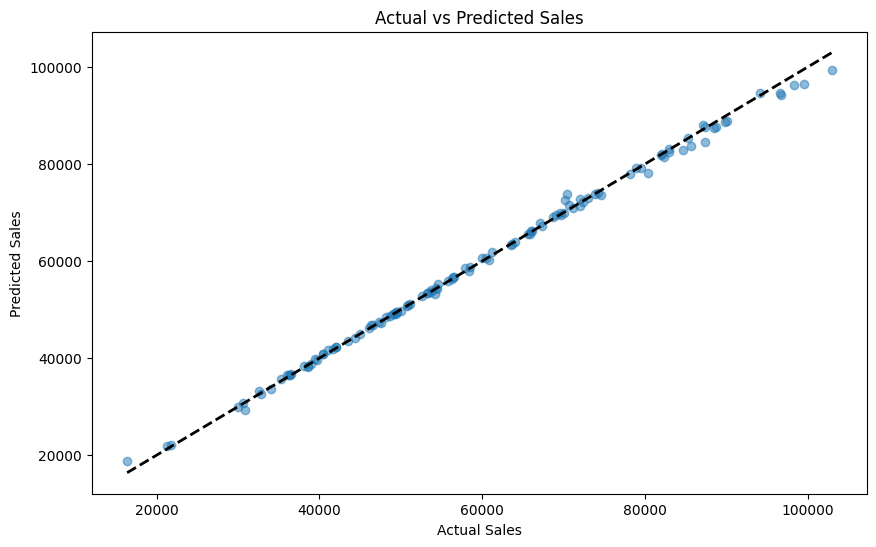

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Удаление строк с NaN
feature_matrix = feature_matrix.dropna()
val_feature_matrix = val_feature_matrix.dropna()
test_feature_matrix = test_feature_matrix.dropna()

# Разделение данных на обучающую и тестовую выборки
X_train = feature_matrix.drop("Store_Sales", axis=1)
y_train = feature_matrix["Store_Sales"]
X_val = val_feature_matrix.drop("Store_Sales", axis=1)
y_val = val_feature_matrix["Store_Sales"]
X_test = test_feature_matrix.drop("Store_Sales", axis=1)
y_test = test_feature_matrix["Store_Sales"]

# Выбор модели
model = RandomForestRegressor(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-scores.mean())**0.5
print(f"Cross-validated RMSE: {rmse_cv}")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns


# Проверка на переобучение
y_train_pred = model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title("Actual vs Predicted Sales")
plt.show()

Точность предсказаний: Модель показывает довольно высокий R² (0.9975), что указывает на хорошее объяснение вариации распродаж. Значения RMSE и MAE довольно низки, что говорит о том, что модель достаточно точно предсказывает цены.

Переобучение: Разница между RMSE на обучающей и тестовой выборках не очень большая, что указывает на то, что переобучение не является критическим. Однако, стоит быть осторожным и продолжать мониторинг этого показателя.
